In [1]:
import joblib

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from wordcloud import WordCloud
from collections import defaultdict


In [2]:
df = joblib.load(r"../..\Data\preproccesed\Instagram\Instagram_proccesed.pkl")

In [5]:
df['Sentiment'].unique()

array(['Negative', 'Positive'], dtype=object)

In [109]:
df.groupby('rating')['rating'].count()

rating
1    93078
2    27371
3    26527
4    23435
5    39660
Name: rating, dtype: int64

Text(0.5, 1.0, 'Negative vs non negative')

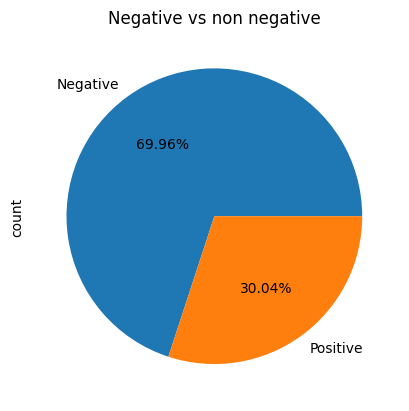

In [110]:
df["Sentiment"].value_counts().plot(kind = 'pie', autopct = '%1.2f%%')
plt.title("Negative vs non negative")

In [111]:
df['len'] = df["review_description"].str.len()

In [112]:
df['Sentiment']

0         Negative
1         Negative
2         Positive
3         Negative
4         Negative
            ...   
210537    Negative
210538    Positive
210539    Positive
210540    Negative
210541    Positive
Name: Sentiment, Length: 210071, dtype: object

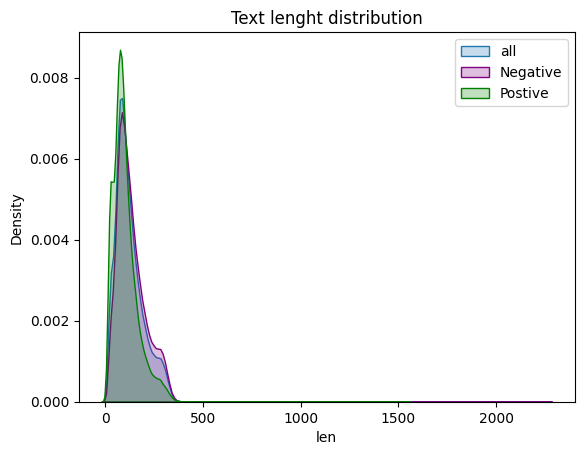

In [113]:
sns.kdeplot(df['len'], fill= True, label = "all")
sns.kdeplot(df['len'][df['Sentiment'] == 'Negative'], fill= True, color='purple', label = "Negative")
sns.kdeplot(df['len'][df['Sentiment'] == 'Positive'], fill= True, color='green', label = "Postive")
plt.legend()
plt.title("Text lenght distribution")
plt.show()

In [114]:
df.groupby("Sentiment")["len"].mean()

Sentiment
Negative    131.006681
Positive     99.346192
Name: len, dtype: float64

In [115]:
df.groupby("Sentiment")["len"].median()

Sentiment
Negative    114.0
Positive     86.0
Name: len, dtype: float64

In [116]:
df

,review_description,rating,Sentiment,len
0,app good connecting friend family even potenti...,3,Negative,287
1,used favorite social medium app improvement ma...,2,Negative,299
2,instagram best social medium ig posting platfo...,5,Positive,317
3,love app late problem screen background turnin...,2,Negative,216
4,used great app many bug issue ever plus ruinin...,3,Negative,278
...,...,...,...,...
210537,love app lately dm messing badly take send rep...,2,Negative,63
210538,fun addictive let see new idea craft bunch coo...,5,Positive,62
210539,user friendly thing available entertainment co...,5,Positive,75
210540,issue upload story redmi k viewed friend appea...,1,Negative,82


In [117]:
def sentiments(S):
    world_List = defaultdict(int)

    for words in df["review_description"][df['Sentiment'] == S]:
        for w in words.split(' '):
            world_List[str(w)] += 1
            
        
    # Display
    
    word_list = pd.DataFrame(world_List.items(), columns= ["words",'jumlah'])
    word_list_sorted = word_list.sort_values(by = 'jumlah', ascending= False)
    display(word_list_sorted.head(10))
    
    
    # plots
    plt.Figure(figsize=(10,10))
    word_list_sorted = pd.DataFrame(word_list_sorted)
    sns.barplot(data = word_list_sorted.iloc[0:10], x = 'words', y = "jumlah" )
    plt.xticks(rotation= 30)
    plt.title(f"{S} bar plot")
    plt.show()
    # Make the word cloud 
    cloud = WordCloud(width = 1500, height= 1200, max_words= 50).generate_from_frequencies(world_List)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{S} word cloud")
    plt.show()

,words,jumlah
0,app,84835
126,instagram,59502
185,account,41667
268,post,41276
267,update,31974
68,time,30585
101,please,29745
102,fix,27793
12,problem,27592
116,like,26818


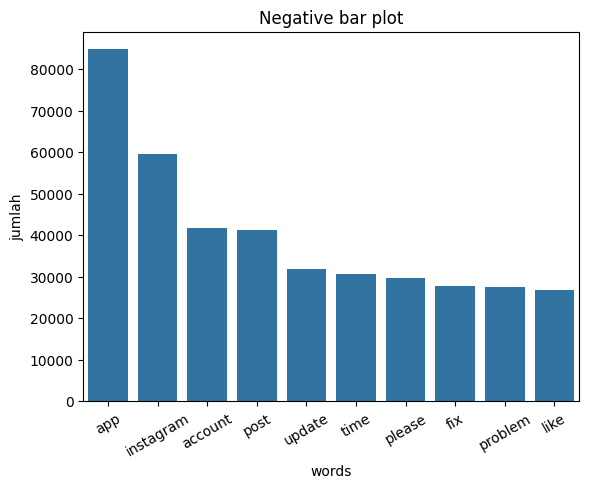

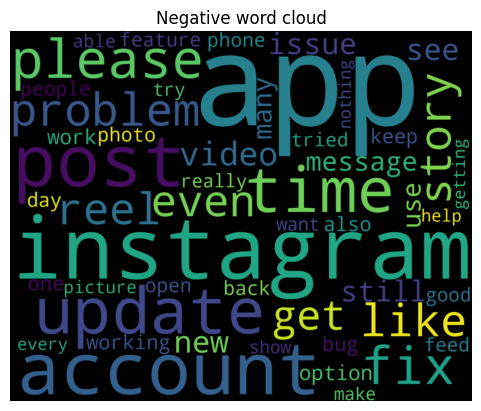

In [118]:
sentiments('Negative')

In [119]:
df["Sentiment"]

0         Negative
1         Negative
2         Positive
3         Negative
4         Negative
            ...   
210537    Negative
210538    Positive
210539    Positive
210540    Negative
210541    Positive
Name: Sentiment, Length: 210071, dtype: object

,words,jumlah
45,app,41100
0,instagram,24980
73,good,16004
189,like,13563
44,love,11751
214,post,9741
100,great,9513
275,people,8469
38,video,8456
226,please,8343


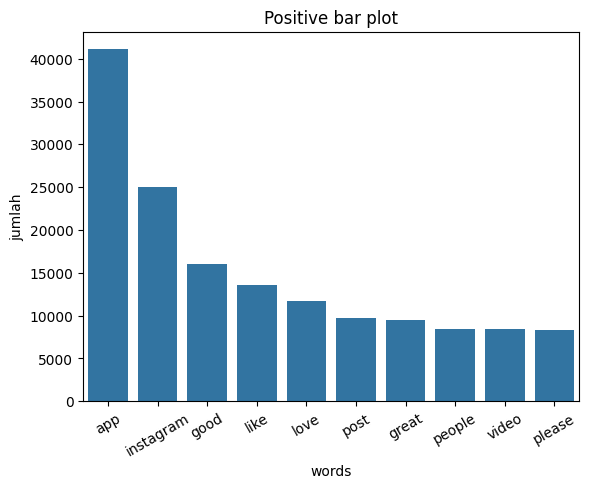

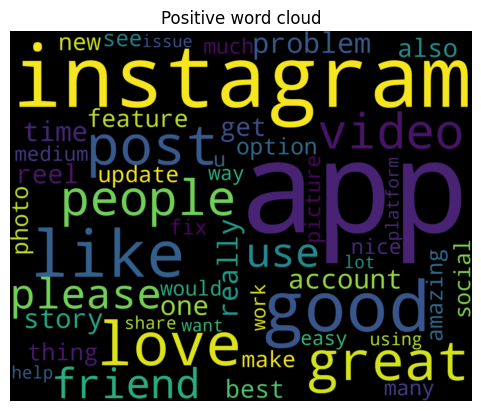

In [120]:
sentiments('Positive')